In [1]:
CODE_REPO_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/analysis/'

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import sys
import os

import pandas as pd
import scipy as sc
import numpy as np

sys.path.insert(0, CODE_REPO_PATH)
import read_data as rd
import wind_task as wt

%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/data/'
FIGURE_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/Figures/pdf_and_png/'
SOURCE_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/source_data/'

save_figure=False
save_source_data=False

### Load recordings

In [3]:
reload(wt)
genotypes=wt.load_data(DATA_PATH)

57C10_AD_VT037220_DBD_TNT_E_rep1
57C10_AD_VT037220_DBD_TNT_Q_rep1
57C10_AD_VT037220_DBD_TNT_E_rep2
57C10_AD_VT037220_DBD_TNT_Q_rep2
27E08_AD_VT037220_DBD_TNT_E
27E08_AD_VT037220_DBD_TNT_Q
empty_AD_empty_DBD_shibire
57C10_AD_VT037220_DBD_shibire
60D05_shibire
empty_AD_empty_DBD_shibire_no_wind


### Gets wind trials
Uncomment this. This may take a long time

In [4]:
# reload(wt)
# trials= wt.get_trials(genotypes)

Once trials have been created you can load the pickled objeact instead of the reloading files and re-creating the trials dataframe

In [3]:
import joblib
## joblib.dump(trials,DATA_PATH+'Wind_task'+os.path.sep+'trials.pkl')
trials=joblib.load(DATA_PATH+'Wind_task'+os.path.sep+'trials.pkl')


### Get summary of trials

In [4]:
reload(wt)
summary_trials=wt.get_summary_trials(trials)
heading_vs_wind_df=wt.get_heading_vs_wind_df(summary_trials)
trials,summary_trials,heading_vs_wind_df=wt.exclude_flies(trials,summary_trials,heading_vs_wind_df)

5 flies excluded from 331 total flies
['2023_10_17_9005', '2023_10_21_9005', '2023_09_15_9003', '2023_09_25_0005', '2023_09_25_9000']
Total flies in included dataset:
genotype
27E08_AD_VT037220_DBD_TNT_E           50
27E08_AD_VT037220_DBD_TNT_Q           48
57C10_AD_VT037220_DBD_TNT_E_rep1      25
57C10_AD_VT037220_DBD_TNT_E_rep2      57
57C10_AD_VT037220_DBD_TNT_Q_rep1      22
57C10_AD_VT037220_DBD_TNT_Q_rep2      50
57C10_AD_VT037220_DBD_shibire         21
60D05_shibire                         10
empty_AD_empty_DBD_shibire            22
empty_AD_empty_DBD_shibire_no_wind    21
dtype: int64


In [5]:
# max deviation between set and measured allowing
np.max(np.abs(summary_trials['allowind_during_true']-summary_trials['allowind_during']))

12.782527010115473

In [6]:
# this gives us the percentage of trials with no walking (after exlusion of flies)
np.sum(np.isnan(summary_trials['mean_xstim_after']))/len(summary_trials['mean_xstim_after'])

0.0020453383330492586

In [7]:
# number of flies with at least one wind direction block that doesnt have both trial 2 and 3
len(summary_trials.query('n_trial>1')[np.isnan(summary_trials.query('n_trial>1')['mean_xstim_after'])]['rec_name'].unique().tolist())

5

### Example trace of first three trials from a control fly (Fig. 6d)

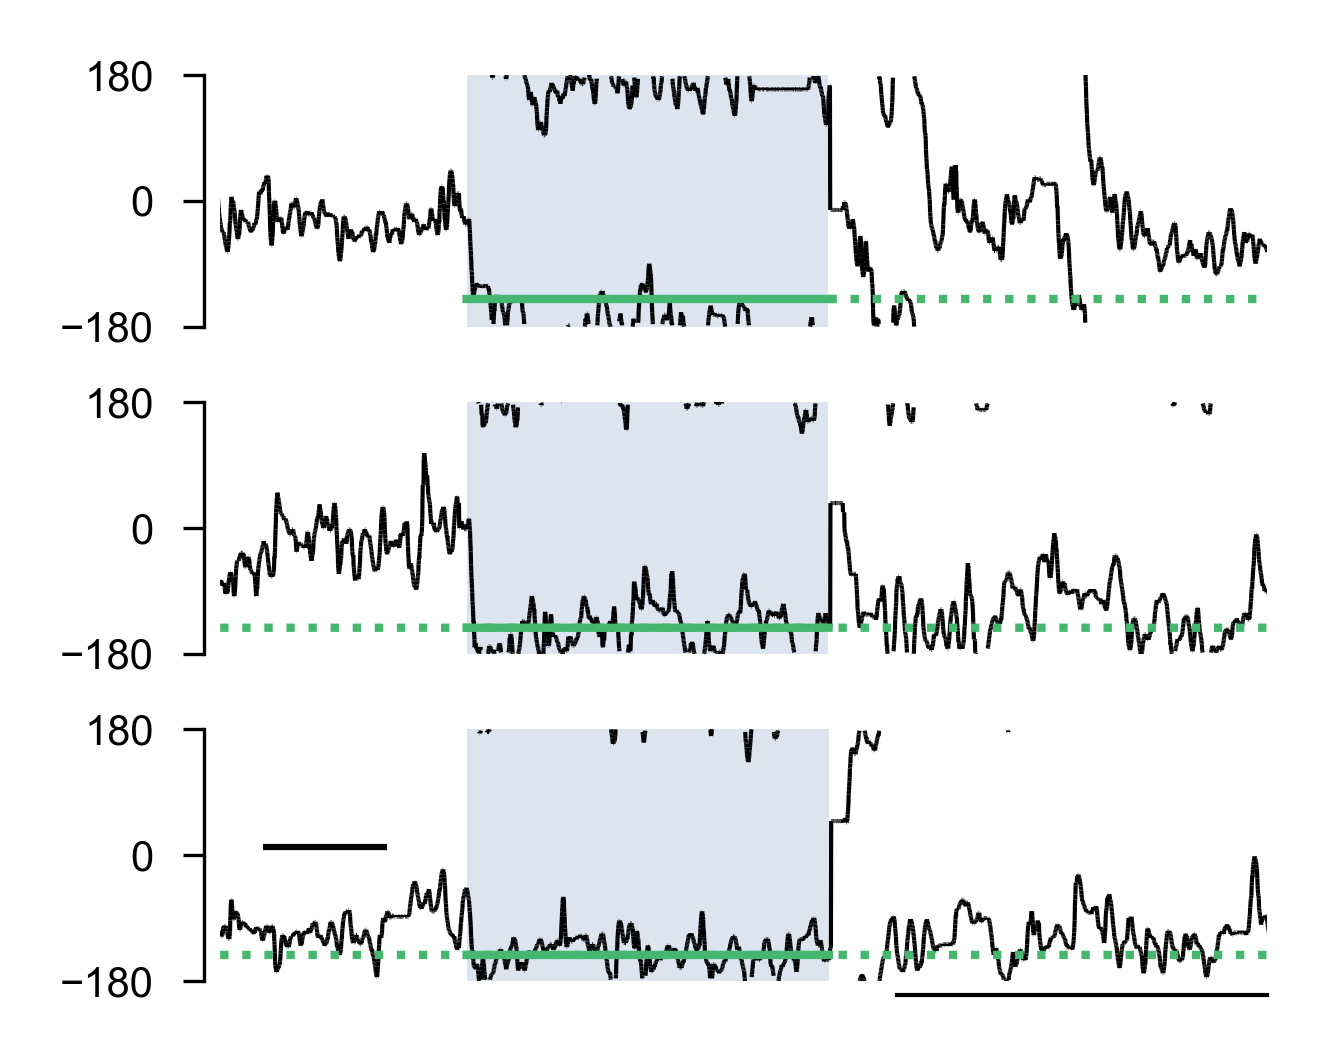

In [8]:
reload(wt)
wt.plot_example_first_three(trials,genotype='empty_AD_empty_DBD_shibire',fly_id=5,
                            save=save_figure,
                            savepath=FIGURE_PATH,
                            fname='Fig_6d.pdf')

### Example trace of the second trial from each wind direction block from a control fly (Fig. 6d)

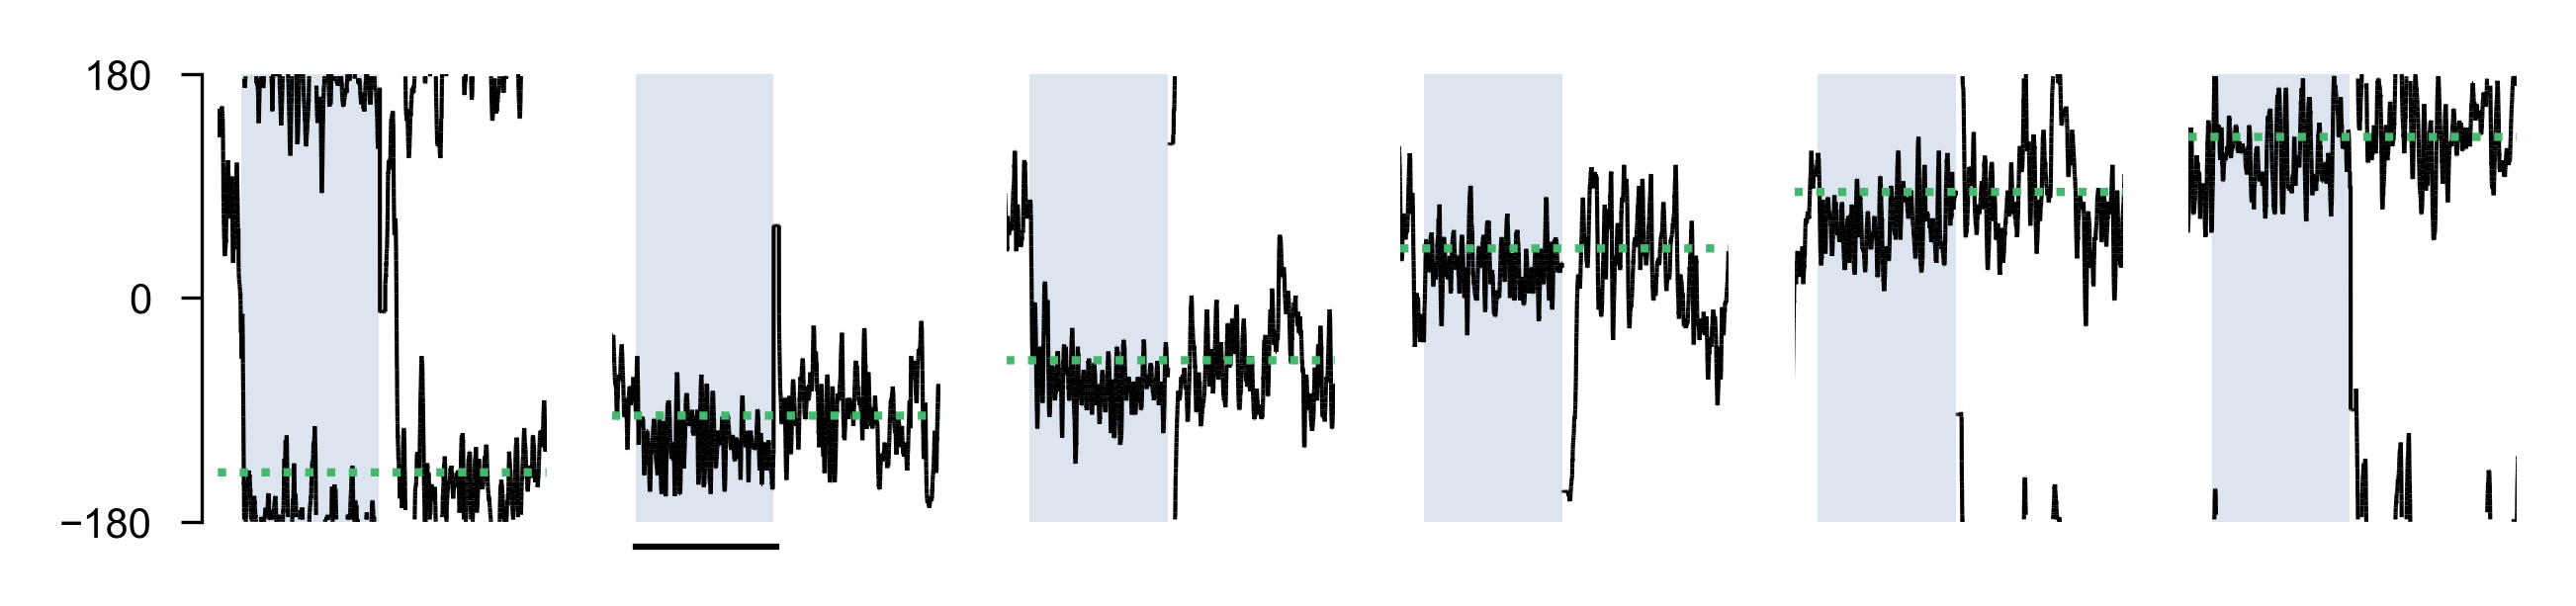

In [9]:
reload(wt)
wt.plot_example_2nd_trial(trials,genotype='empty_AD_empty_DBD_shibire',
                          fly_id=8,
                          save=save_figure,
                          savepath=FIGURE_PATH,
                         fname='Fig_6g.pdf')

### Mean heading after wind period vs. allocentric wind direction for example flies (Fig. 6h)

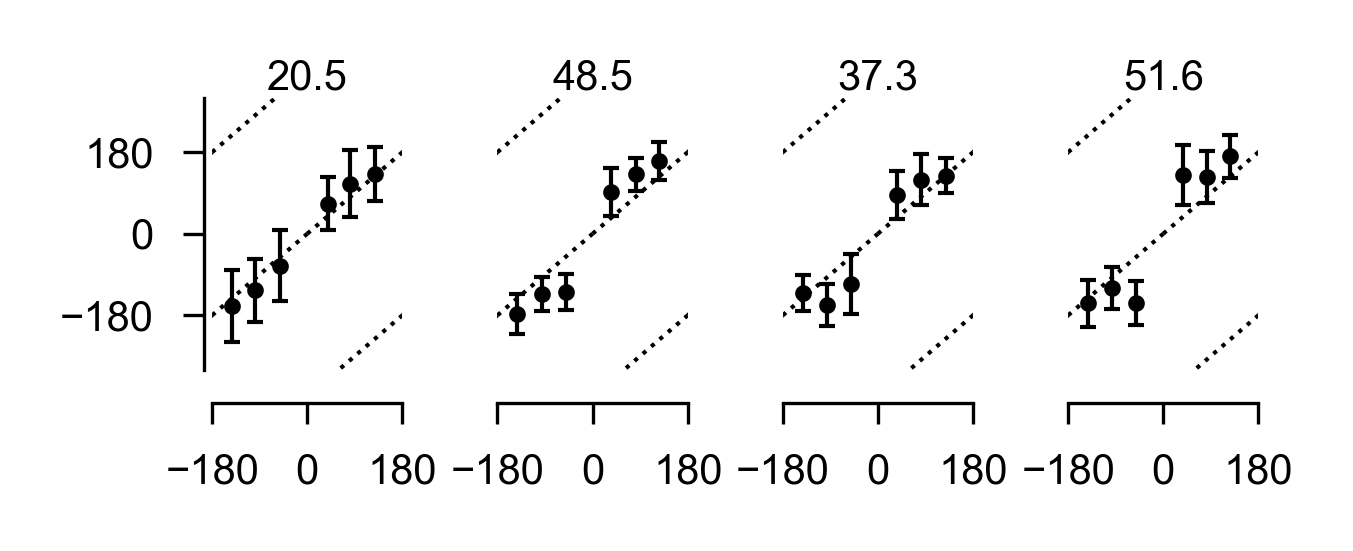

In [10]:
reload(wt)
wt.plot_mean_xstim_after_vs_allowind_during_example(heading_vs_wind_df,
                                                    genotype='57C10_AD_VT037220_DBD_TNT_Q_rep1',
                                                    fly_ids=[4,5,8,3],
                                                         save=save_figure,
                                                    savepath=FIGURE_PATH,
                                                    fname='Fig_6h_57C10_AD_VT037220_DBD_TNT_Q_rep1.pdf'
                                                   )

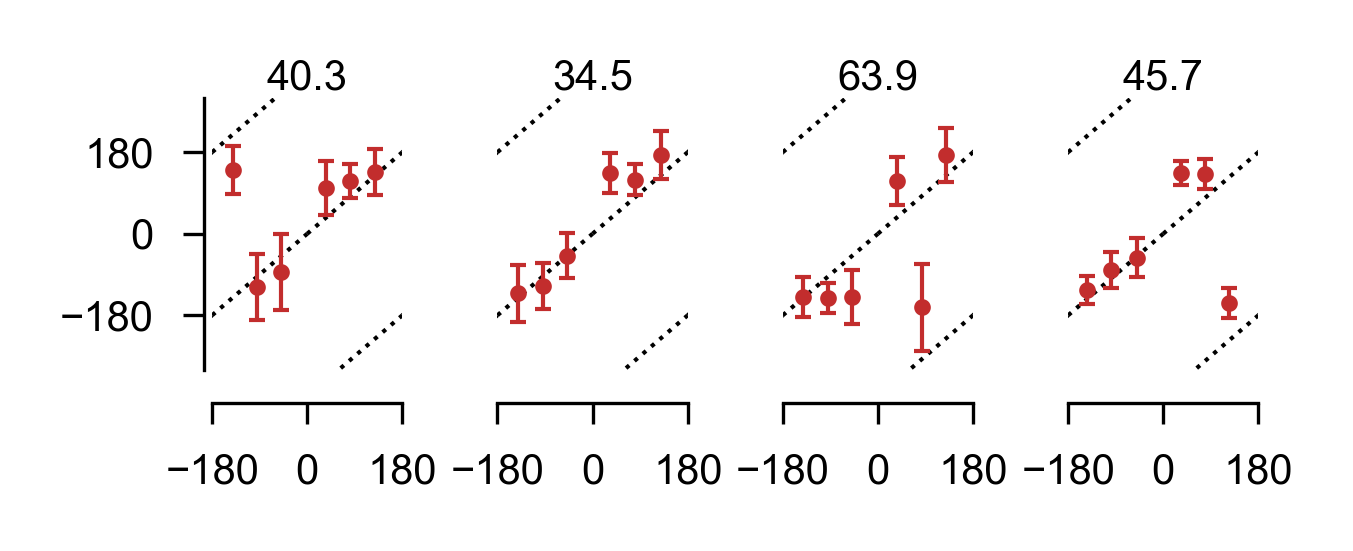

In [11]:
reload(wt)
wt.plot_mean_xstim_after_vs_allowind_during_example(heading_vs_wind_df,
                                                    genotype='57C10_AD_VT037220_DBD_TNT_E_rep1',
                                                    fly_ids=[2,8,16,21],
                                                     save=save_figure,
                                                    savepath=FIGURE_PATH,
                                                    fname='Fig_6h_57C10_AD_VT037220_DBD_TNT_E_rep1.pdf'
                                                   )

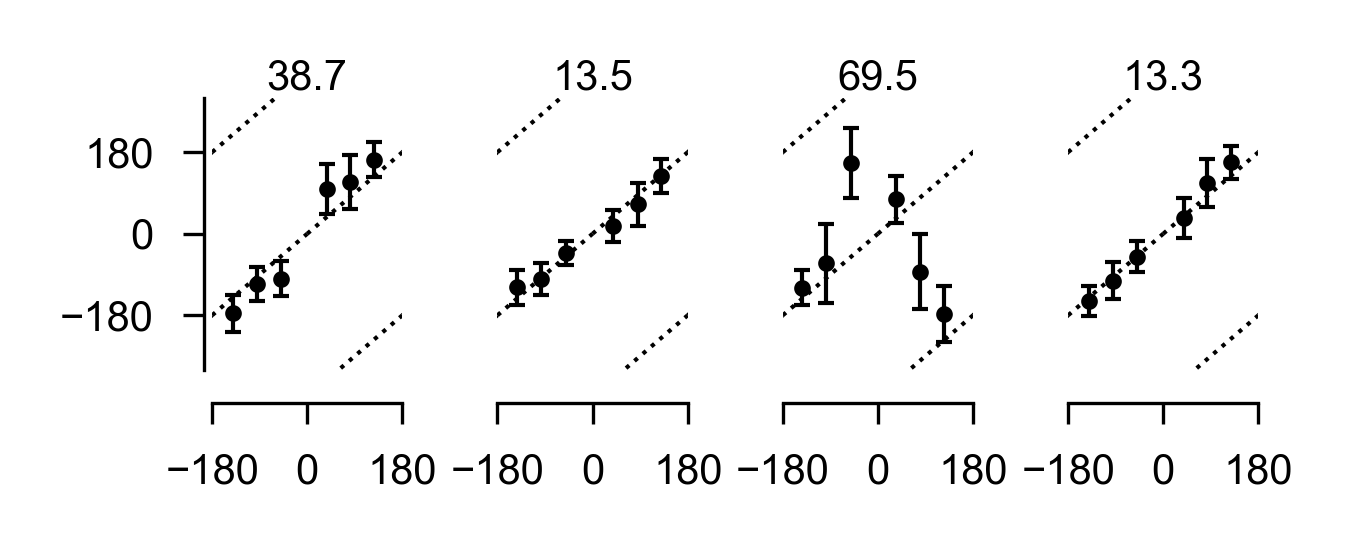

In [12]:
reload(wt)
wt.plot_mean_xstim_after_vs_allowind_during_example(heading_vs_wind_df,
                                                    genotype='empty_AD_empty_DBD_shibire',
                                                    fly_ids=[1,5,6,8],
                                                        save=save_figure,
                                                    savepath=FIGURE_PATH,
                                                    fname='Fig_6h_empty_AD_empty_DBD_shibire.pdf'
                                                   )

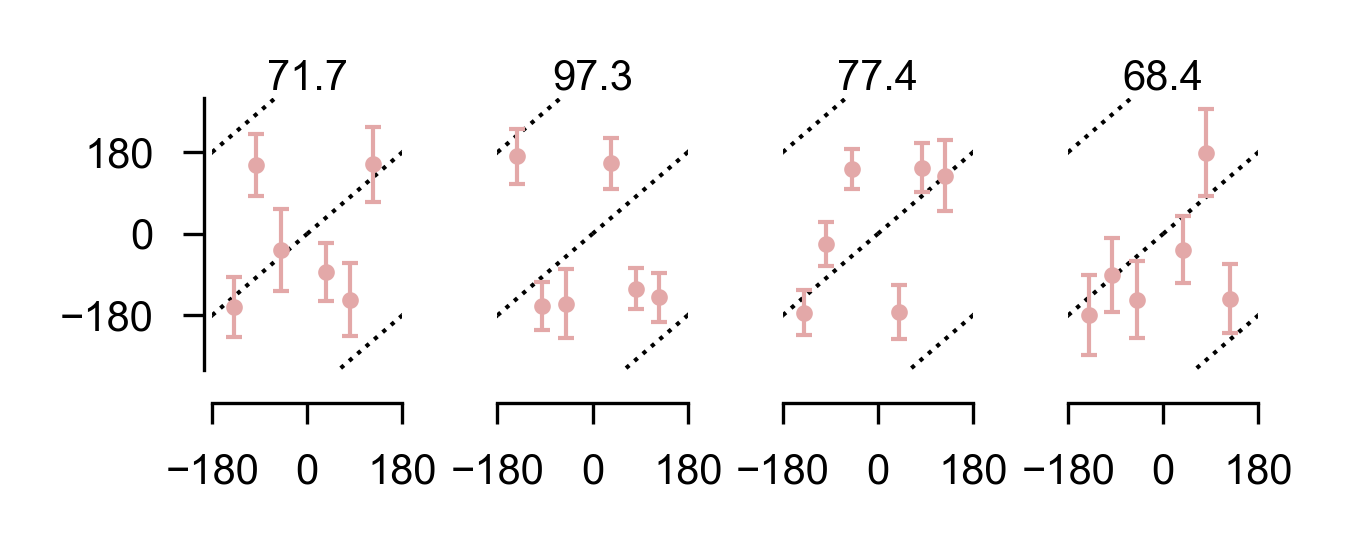

In [13]:
reload(wt)
wt.plot_mean_xstim_after_vs_allowind_during_example(heading_vs_wind_df,
                                                    genotype='60D05_shibire',
                                                    fly_ids=[1,2,3,4],
                                                    save=save_figure,
                                                    savepath=FIGURE_PATH,
                                                    fname='Fig_6h_60D05_shibire.pdf'
                                                   )

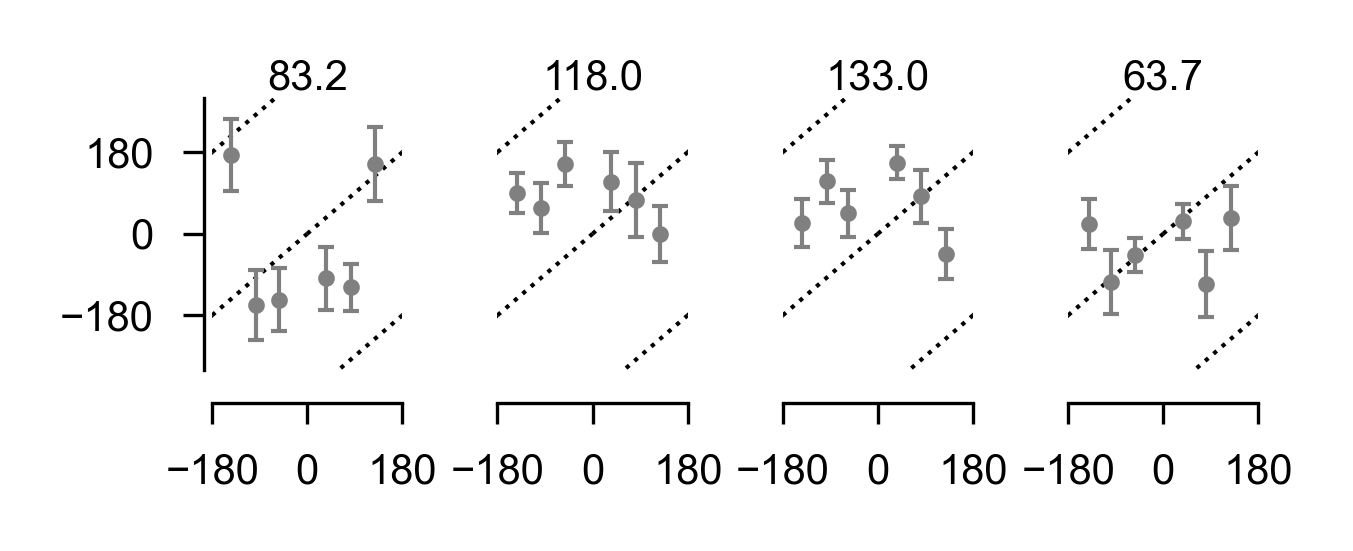

In [14]:
reload(wt)
wt.plot_mean_xstim_after_vs_allowind_during_example(heading_vs_wind_df,
                                                    genotype='empty_AD_empty_DBD_shibire_no_wind',
                                                    fly_ids=[2,3,4,9],
                                                    save=save_figure,
                                                    savepath=FIGURE_PATH,
                                                    fname='Fig_6h_empty_AD_empty_DBD_shibire_no_wind.pdf'
                                                   )

In [15]:
reload(wt)
wt.write_heading_vs_wind_df(heading_vs_wind_df,
                            save=save_source_data,
                            savepath=SOURCE_DATA_PATH,
                            fname='Fig_6h.csv')

### Probability distrubtion of heading realtive to wind direction during wind period

For control flies (Fig. 6e)

In [16]:
reload(wt)
during_dist_to_wind_fly_hist_df,during_dist_to_wind_genotype_hist_df=wt.get_direction_hist(trials,
                      query=' (trial_time>=0) &(trial_time<30)& (is_OL==True) & (`dforw_boxcar_average_0.5_s`>1)',
                      label='dist_to_wind')

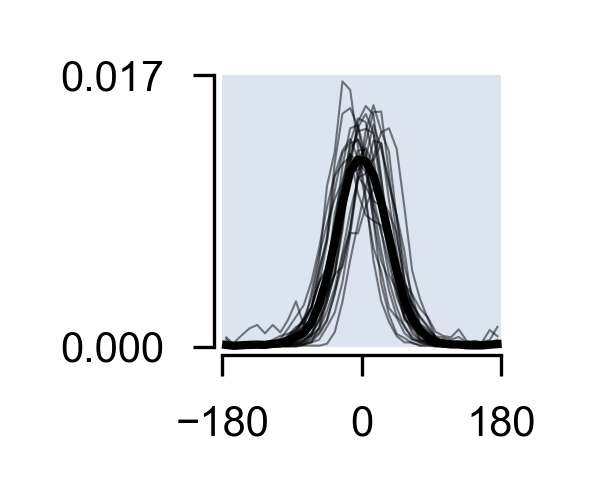

In [17]:
reload(wt)
wt.plot_dist_to_wind_hist(during_dist_to_wind_fly_hist_df,during_dist_to_wind_genotype_hist_df,
                        genotype='empty_AD_empty_DBD_shibire',
                          during=True,
                         save=save_figure,
                         savepath=FIGURE_PATH,
                        fname='Fig_6e_during.pdf')

No wind flies (ED Fig. 11a)

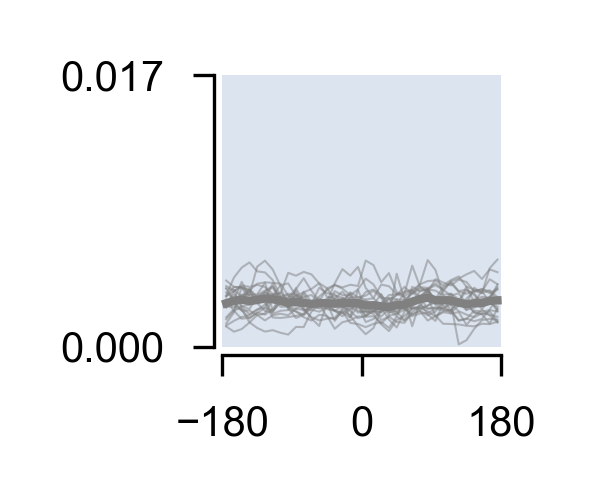

In [18]:
reload(wt)
wt.plot_dist_to_wind_hist(during_dist_to_wind_fly_hist_df,during_dist_to_wind_genotype_hist_df,
                        genotype='empty_AD_empty_DBD_shibire_no_wind',
                          during=True,
                         save=save_figure,
                         savepath=FIGURE_PATH,
                        fname='ED_Fig_11a_during.pdf')

### Probability distrubtion of heading realtive to wind direction during test period

In [19]:
reload(wt)
after_dist_to_wind_fly_hist_df,after_dist_to_wind_genotype_hist_df=wt.get_direction_hist(trials,
                      query='(trial_time>=35) &(trial_time<65)& (`dforw_boxcar_average_0.5_s`>1)',
                      label='dist_to_wind')

For control flies (Fig. 6e)

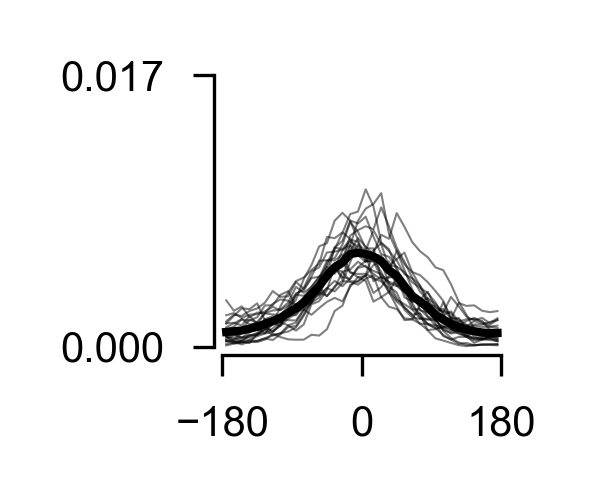

In [20]:
reload(wt)
wt.plot_dist_to_wind_hist(after_dist_to_wind_fly_hist_df,after_dist_to_wind_genotype_hist_df,
                        genotype='empty_AD_empty_DBD_shibire',
                          during=False,
                        save=save_figure,
                        savepath=FIGURE_PATH,
                       fname='Fig_6e_after.pdf')

No wind flies (ED Fig. 11a)

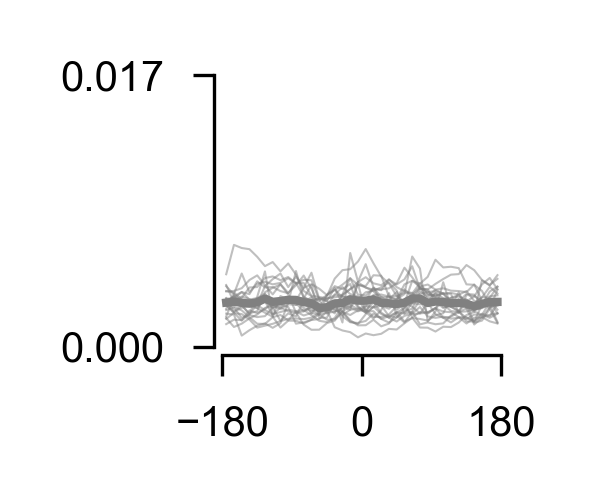

In [21]:
reload(wt)
wt.plot_dist_to_wind_hist(after_dist_to_wind_fly_hist_df,after_dist_to_wind_genotype_hist_df,
                        genotype='empty_AD_empty_DBD_shibire_no_wind',
                          during=False,
                        save=save_figure,
                        savepath=FIGURE_PATH,
                       fname='ED_Fig_11a_after.pdf')

### Absolute heading relative to wind direction by within-block trial number
Figure out why it looks slightly different than before!!!

In [22]:
reload(wt)
abs_dist_to_wind_by_ntrial_fly,\
abs_dist_to_wind_by_ntrial_genotype=wt.get_abs_dist_to_wind_by_ntrial(summary_trials,
                                                                     save=save_source_data,
                                                                     savepath=SOURCE_DATA_PATH,
                                                                     fname='ED_Fig_11c.csv')

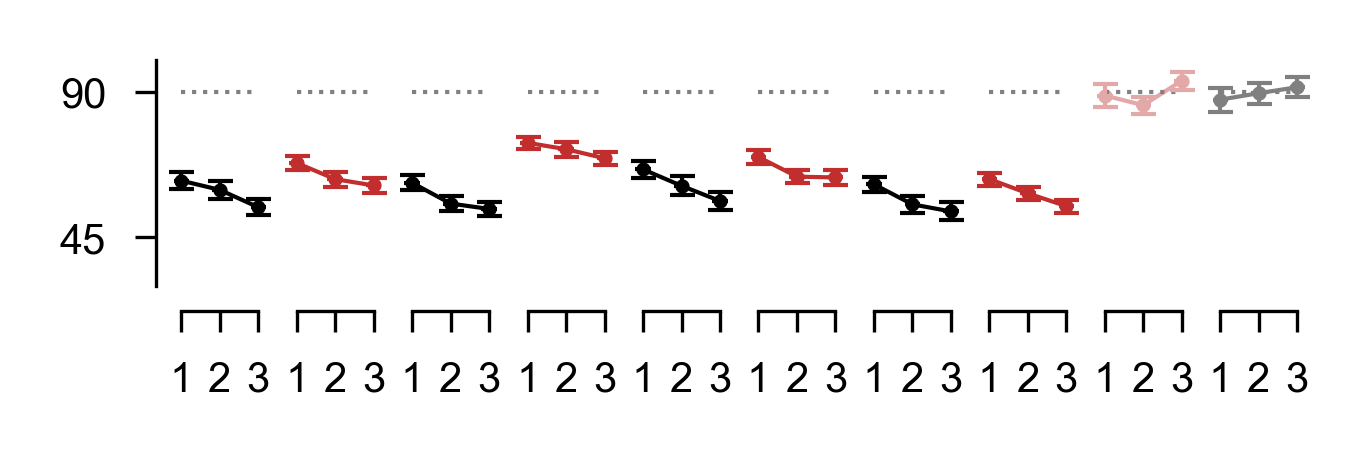

In [23]:
reload(wt)
wt.plot_abs_dist_to_wind_by_ntrial(abs_dist_to_wind_by_ntrial_genotype,
                                   save=save_figure,
                                   savepath=FIGURE_PATH,
                                  fname='ED_Fig_11c.pdf')

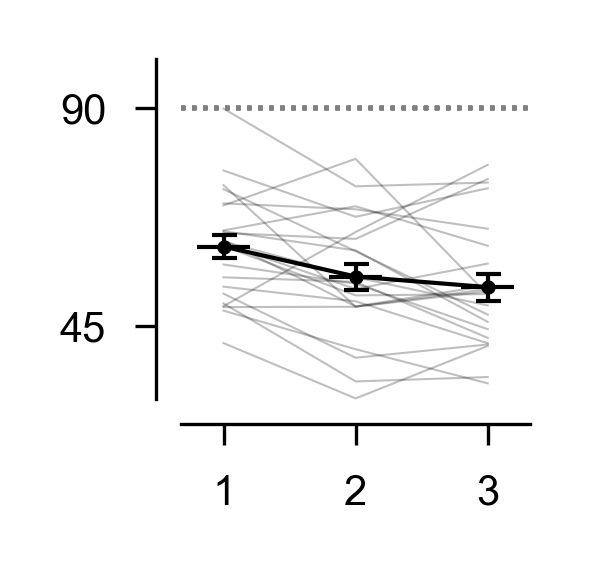

In [24]:
reload(wt)
wt.plot_abs_dist_to_wind_by_ntrial_one_geno(abs_dist_to_wind_by_ntrial_fly,
                                            abs_dist_to_wind_by_ntrial_genotype,
                                            genotype='empty_AD_empty_DBD_shibire',
                                            save=save_figure,
                                            savepath=FIGURE_PATH,
                                           fname='Fig_6f.pdf')

### Absolute heading realative to wind over time (ED Fig. 11b)

In [25]:
reload(wt)
abs_dist_to_wind_vs_time=wt.get_dist_to_wind_over_time(trials)

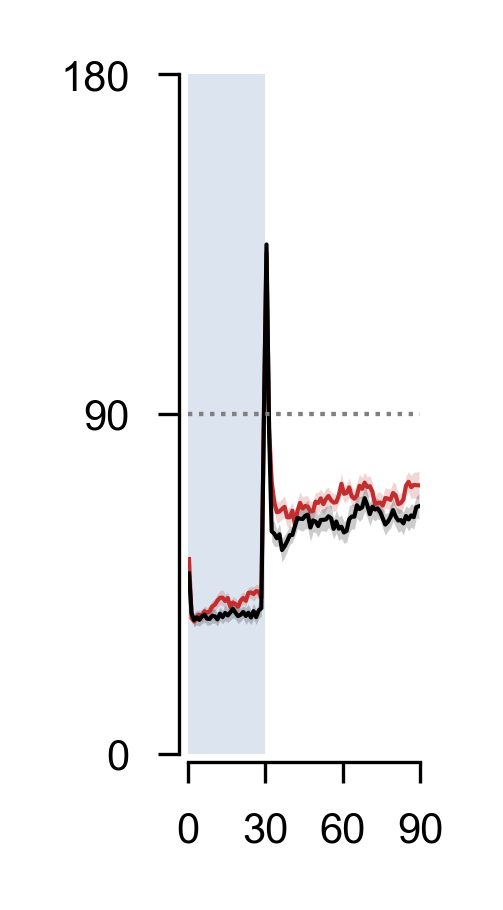

In [26]:
reload(wt)
wt.plot_abs_dist_to_wind_over_time(abs_dist_to_wind_vs_time,
                                   genotypes=['57C10_AD_VT037220_DBD_TNT_E_rep1','57C10_AD_VT037220_DBD_TNT_Q_rep1'],
                                   save=save_figure,
                                   savepath=FIGURE_PATH,
                                  fname='ED_Fig_11b_column1.pdf')

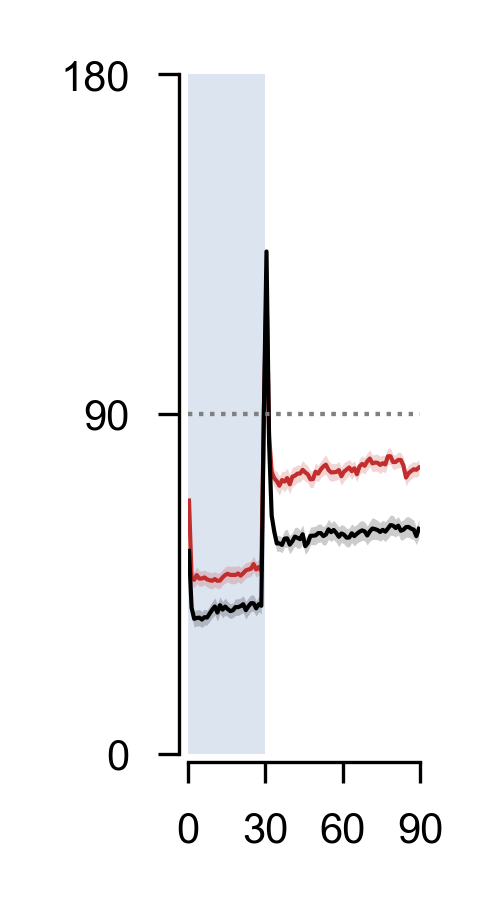

In [27]:
reload(wt)
wt.plot_abs_dist_to_wind_over_time(abs_dist_to_wind_vs_time,
                                   genotypes=['57C10_AD_VT037220_DBD_TNT_E_rep2','57C10_AD_VT037220_DBD_TNT_Q_rep2'],
                                   save=save_figure,
                                   savepath=FIGURE_PATH,
                                  fname='ED_Fig_11b_column2.pdf')

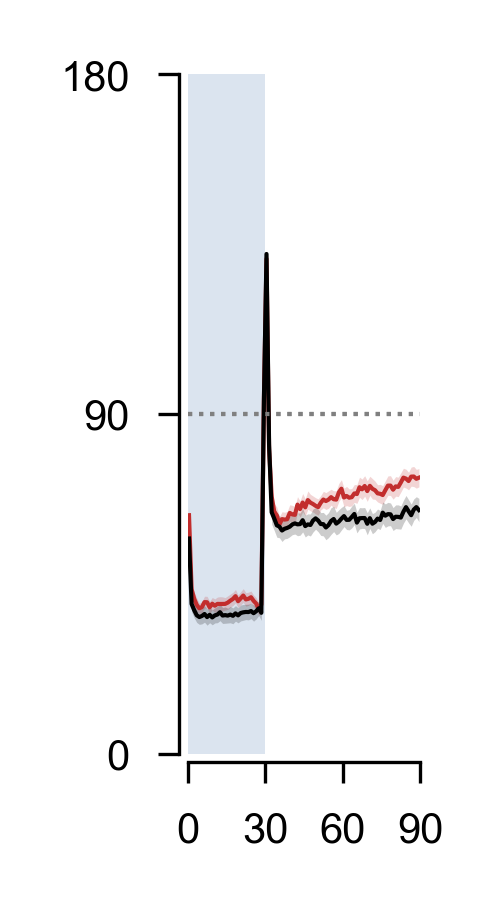

In [28]:
reload(wt)
wt.plot_abs_dist_to_wind_over_time(abs_dist_to_wind_vs_time,
                                   genotypes=['27E08_AD_VT037220_DBD_TNT_E','27E08_AD_VT037220_DBD_TNT_Q'],
                                   save=save_figure,
                                   savepath=FIGURE_PATH,
                                  fname='ED_Fig_11b_column3.pdf')

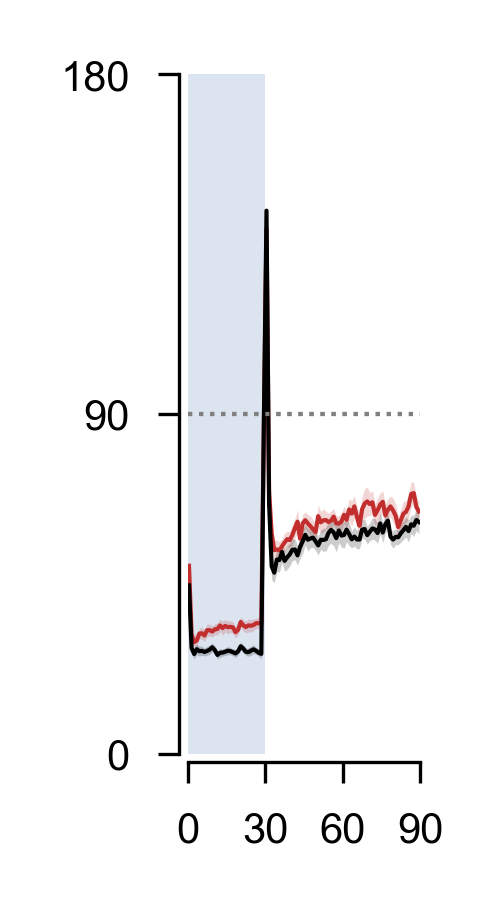

In [29]:
reload(wt)
wt.plot_abs_dist_to_wind_over_time(abs_dist_to_wind_vs_time,
                                   genotypes=['57C10_AD_VT037220_DBD_shibire','empty_AD_empty_DBD_shibire'],
                                   save=save_figure,
                                   savepath=FIGURE_PATH,
                                  fname='ED_Fig_11b_column4.pdf')

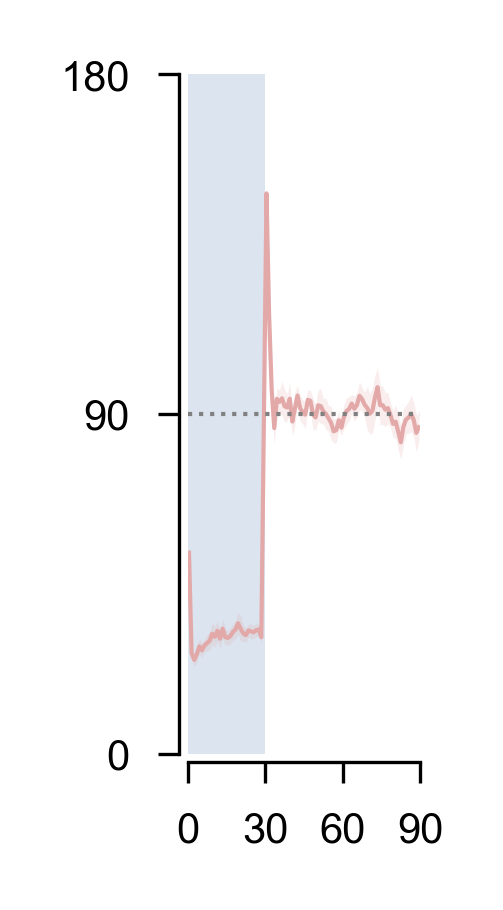

In [30]:
reload(wt)
wt.plot_abs_dist_to_wind_over_time(abs_dist_to_wind_vs_time,
                                   genotypes=['60D05_shibire'],
                                   save=save_figure,
                                   savepath=FIGURE_PATH,
                                  fname='ED_Fig_11b_column5.pdf')

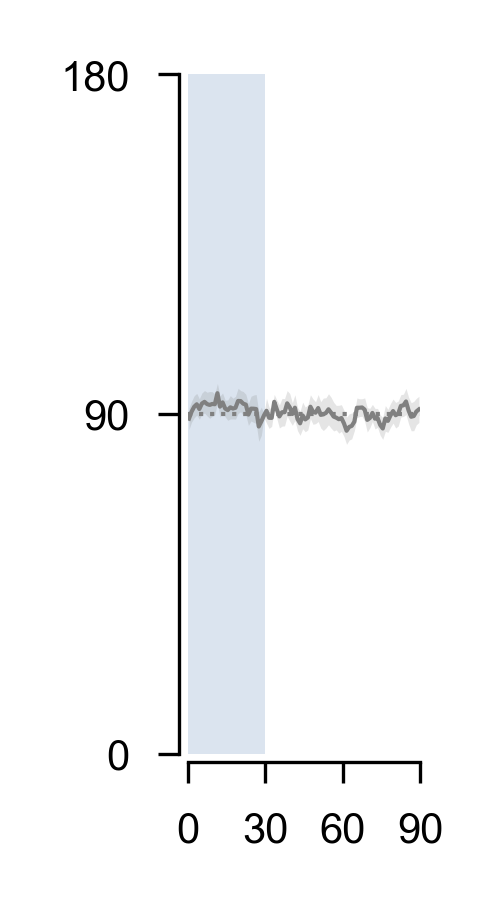

In [31]:
reload(wt)
wt.plot_abs_dist_to_wind_over_time(abs_dist_to_wind_vs_time,
                                   genotypes=['empty_AD_empty_DBD_shibire_no_wind'],
                                   save=save_figure,
                                   savepath=FIGURE_PATH,
                                  fname='ED_Fig_11b_column6.pdf')

### Perfromance index

During wind

In [32]:
reload(wt)
during_PI_fly_df,during_PI_mean_df =wt.get_PI(trials,
                                              query='(trial_time>=0) & (trial_time<30)& (is_OL==True)&(trial_id!=1)  & (`dforw_boxcar_average_0.5_s`>1)',
                                             save=save_source_data,
                                             savepath=SOURCE_DATA_PATH,
                                             fname='ED_Fig_11d_during.csv')

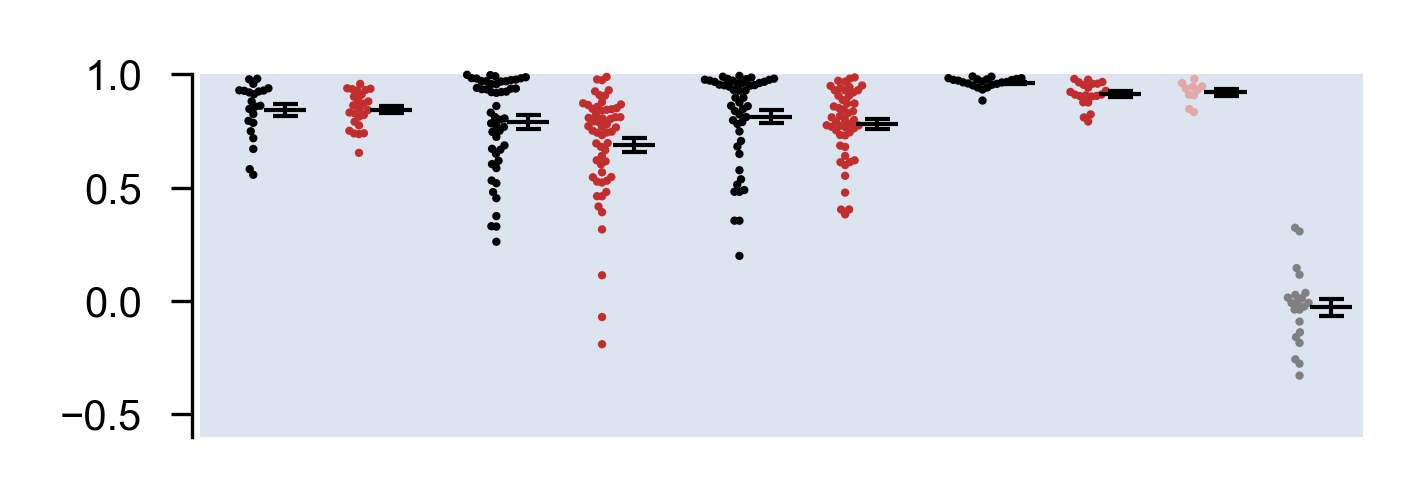

In [33]:
reload(wt)
wt.plot_PI(during_PI_fly_df,during_PI_mean_df,during=True,
           save=save_figure,
           savepath=FIGURE_PATH,
           fname='ED_Fig_11d_during.pdf')

In [34]:
reload(wt)
after_PI_fly_df,after_PI_mean_df =wt.get_PI(trials,query='(trial_time>=35) & (trial_time<65)&(trial_id!=1) & (`dforw_boxcar_average_0.5_s`>1)',
                                            save=save_source_data,
                                             savepath=SOURCE_DATA_PATH,
                                             fname='ED_Fig_11d_after.csv')

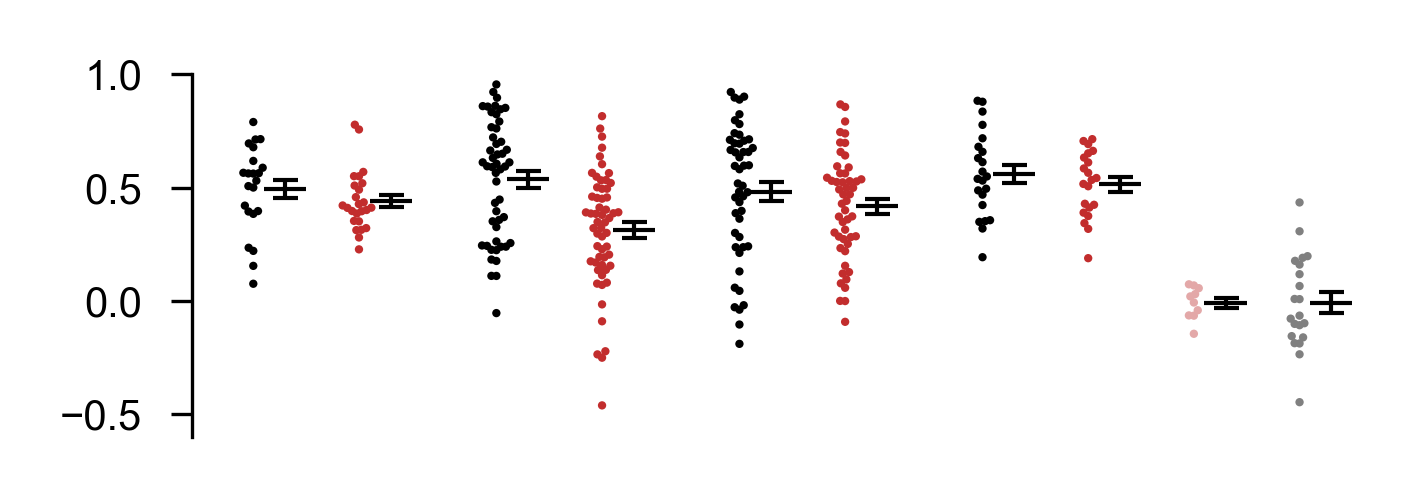

In [35]:
reload(wt)
wt.plot_PI(after_PI_fly_df,after_PI_mean_df,during=False, 
           save=save_figure,
           savepath=FIGURE_PATH,
           fname='ED_Fig_11d_after.pdf')

### Wind-direction error
During wind (Fig. 6i & ED Fig. 11e top)

In [36]:
reload(wt)
fly_error_during_df,genotype_error_during_df=wt.get_error(heading_vs_wind_df,
                                                          when='during',
                                                         save=save_source_data,
                                                         savepath=SOURCE_DATA_PATH,
                                                         fname='ED_Fig_11e_during.csv')

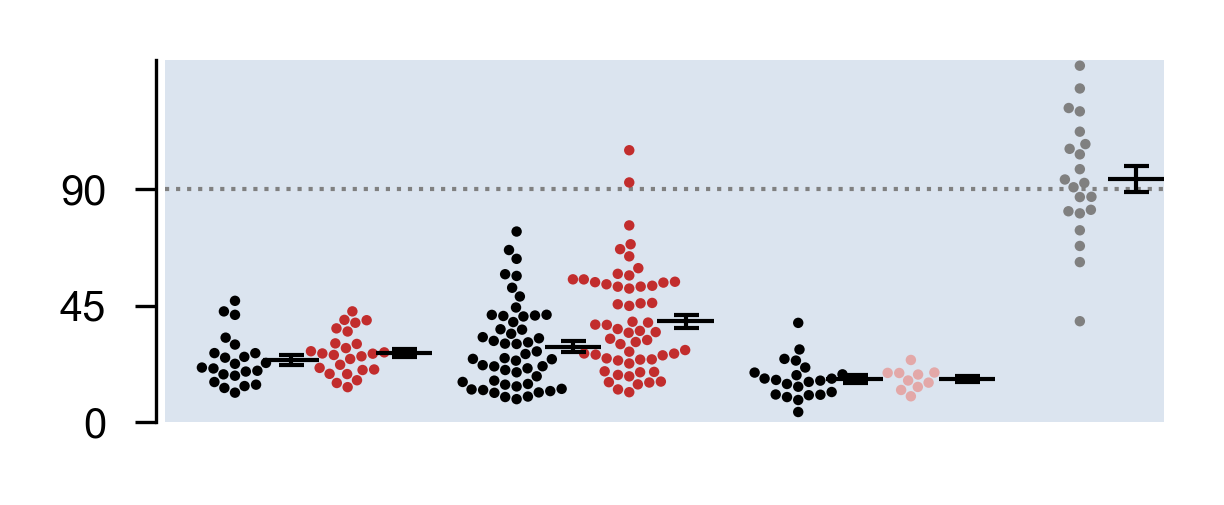

In [37]:
reload(wt)
wt.plot_error(fly_error_during_df,
              genotype_error_during_df,
              order=2,
              during=True,
              save=save_figure,
              savepath=FIGURE_PATH,
              fname='Fig_6i.pdf')

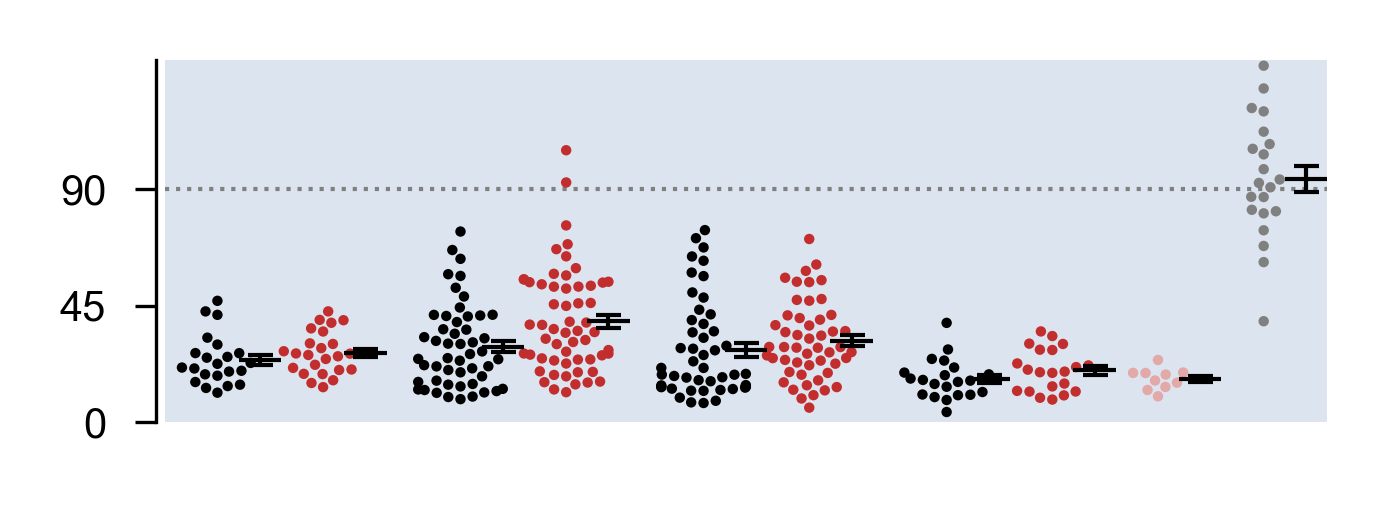

In [38]:
reload(wt)
wt.plot_error(fly_error_during_df,
              genotype_error_during_df,
              order=1,
              figsize=[2.5,0.8],
              during=True,
              save=save_figure,
              savepath=FIGURE_PATH,
              fname='ED_Fig_11e_during.pdf')

In [39]:
x=fly_error_during_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_E_rep2"')['mean'].values
y=fly_error_during_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_Q_rep2"')['mean'].values

test_rep2_57C10_tnt = sc.stats.mannwhitneyu(x,y)
print(test_rep2_57C10_tnt)

print(np.mean(x))
print(np.mean(y))

MannwhitneyuResult(statistic=987.0, pvalue=0.003150341875687326)
39.25920464129066
29.335405920439836


After wind (Fig. 6j & ED Fig. 11e bottom)

In [40]:
reload(wt)
fly_error_after_df,genotype_error_after_df=wt.get_error(heading_vs_wind_df,
                                                        when='after',
                                                         save=save_source_data,
                                                         savepath=SOURCE_DATA_PATH,
                                                         fname='ED_Fig_11e_after.csv')

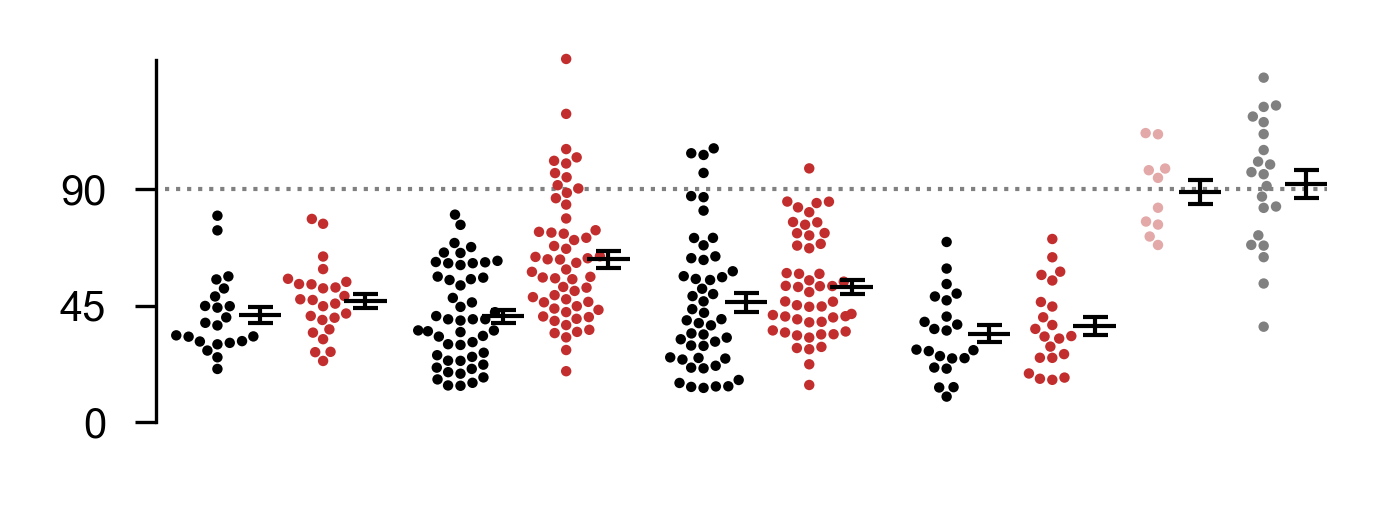

In [41]:
reload(wt)
wt.plot_error(fly_error_after_df,
              genotype_error_after_df,
              order=1,
              figsize=[2.5,0.8],
              during=False,
              save=save_figure,
              savepath=FIGURE_PATH,
              fname='ED_Fig_11e_after.pdf')

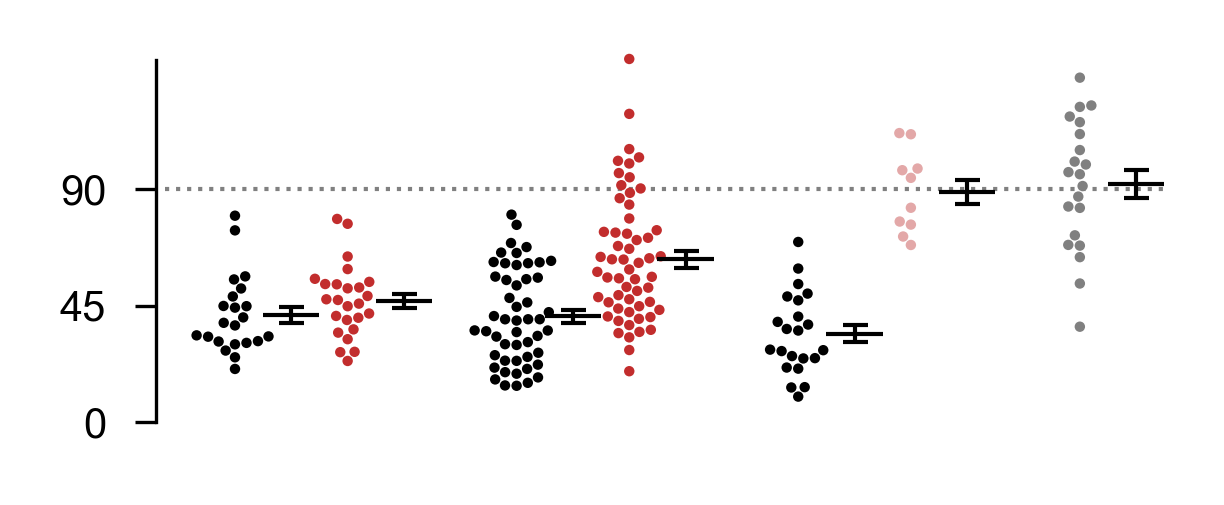

In [42]:
reload(wt)
wt.plot_error(fly_error_after_df,
              genotype_error_after_df,
              order=2,
              during=False,
              save=save_figure,
              savepath=FIGURE_PATH,
              fname='Fig_6j.pdf')

PFL3 line 1, first replica 

In [43]:
x=fly_error_after_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_E_rep1"')['mean'].values
y=fly_error_after_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_Q_rep1"')['mean'].values

test_rep1_57C10_tnt = sc.stats.mannwhitneyu(x,y)
print(test_rep1_57C10_tnt)

print(np.mean(x))
print(np.mean(y))

MannwhitneyuResult(statistic=198.0, pvalue=0.051446691659223276)
46.95171145098596
41.38256977768996


PFL3 line 1, second replica 

In [44]:
x=fly_error_after_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_E_rep2"')['mean'].values
y=fly_error_after_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_Q_rep2"')['mean'].values

test_rep2_57C10_tnt = sc.stats.mannwhitneyu(x,y)
print(test_rep2_57C10_tnt)

print(np.mean(x))
print(np.mean(y))

MannwhitneyuResult(statistic=669.0, pvalue=1.1951487526671209e-06)
63.40522461765346
40.97547772617414


In [45]:
x=fly_error_after_df.query('genotype=="27E08_AD_VT037220_DBD_TNT_E"')['mean'].values
y=fly_error_after_df.query('genotype=="27E08_AD_VT037220_DBD_TNT_Q"')['mean'].values

test_27E08_tnt = sc.stats.mannwhitneyu(x,y)
print(test_27E08_tnt)

print(np.mean(x))
print(np.mean(y))

MannwhitneyuResult(statistic=971.0, pvalue=0.052200840091771325)
52.41425986253741
46.91900418382147


In [46]:
x=fly_error_after_df.query('genotype=="57C10_AD_VT037220_DBD_shibire"')['mean'].values
y=fly_error_after_df.query('genotype=="empty_AD_empty_DBD_shibire"')['mean'].values

test_57C10_shib = sc.stats.mannwhitneyu(x,y)
print(test_57C10_shib)

print(np.mean(x))
print(np.mean(y))

MannwhitneyuResult(statistic=208.0, pvalue=0.29230248604999776)
37.19251227343566
34.16241407697337


Combined p-value

In [47]:
sc.stats.combine_pvalues([test_rep1_57C10_tnt[1],test_rep2_57C10_tnt[1]], method='fisher')[1]

1.0824350633923787e-06

### Wind-direction error for selected flies (ED Fig. 11g)

In [48]:
selected_flies_df = fly_error_during_df.query('(mean>12) &  (mean<45)')
selected_heading_vs_wind_df=selected_flies_df.merge(heading_vs_wind_df,on=['genotype','fly_id'])

In [49]:
selected_fly_error_during_df,selected_genotype_error_during_df=wt.get_error(selected_heading_vs_wind_df,
                                                                            when='during',
                                                                           save=save_source_data,
                                                                           savepath=SOURCE_DATA_PATH,
                                                                           fname='ED_Fig_11g_during.csv')

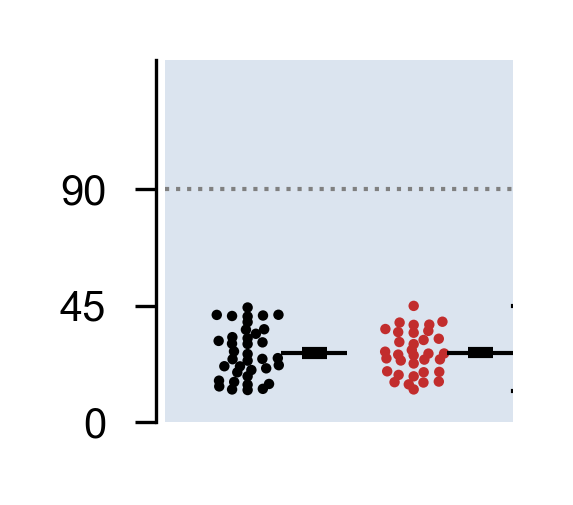

In [50]:
reload(wt)
wt.plot_error(selected_fly_error_during_df,
              selected_genotype_error_during_df,
              order=['57C10_AD_VT037220_DBD_TNT_Q_rep2','57C10_AD_VT037220_DBD_TNT_E_rep2'],
              hlines=[12,45],
              pre_size=[0.5,0.4],
              figsize=[0.75,0.8],
              during=True,
              save=save_figure,
              savepath=FIGURE_PATH,
              fname='ED_Fig_11g_during.pdf')

In [51]:
selected_fly_error_after_df,selected_genotype_error_after_df=wt.get_error(selected_heading_vs_wind_df,
                                                                            when='after',
                                                                           save=save_source_data,
                                                                           savepath=SOURCE_DATA_PATH,
                                                                           fname='ED_Fig_11g_after.csv')

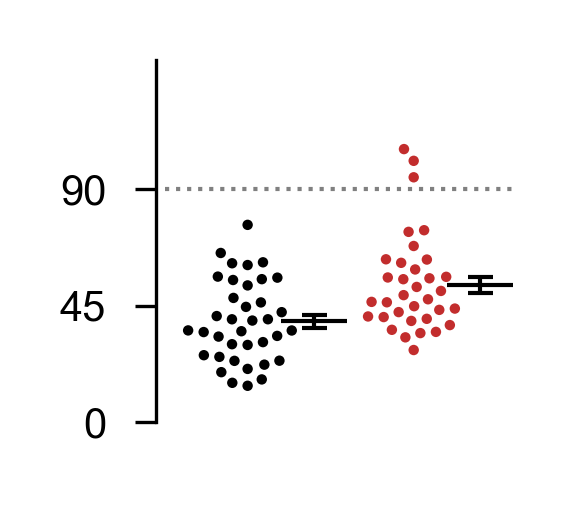

In [52]:
reload(wt)
wt.plot_error(selected_fly_error_after_df,
              selected_genotype_error_after_df,
              order=['57C10_AD_VT037220_DBD_TNT_Q_rep2','57C10_AD_VT037220_DBD_TNT_E_rep2'],
              pre_size=[0.5,0.4],
              figsize=[0.75,0.8],
              during=False,
              save=save_figure,
              savepath=FIGURE_PATH,
              fname='ED_Fig_11g_after.pdf')

In [53]:
x=selected_fly_error_after_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_E_rep2"')['mean'].values
y=selected_fly_error_after_df.query('genotype=="57C10_AD_VT037220_DBD_TNT_Q_rep2"')['mean'].values

test_rep2_57C10_tnt = sc.stats.mannwhitneyu(x,y)
print(test_rep2_57C10_tnt)

print(np.mean(x))
print(np.mean(y))

MannwhitneyuResult(statistic=349.0, pvalue=0.0006474454472623032)
53.357781681342026
39.01654545317413


In [54]:
print('57C10_AD_VT037220_DBD_TNT_E_rep2:',len(x), 'flies')

57C10_AD_VT037220_DBD_TNT_E_rep2: 34 flies


In [55]:
print('57C10_AD_VT037220_DBD_TNT_Q_rep2:',len(y), 'flies')

57C10_AD_VT037220_DBD_TNT_Q_rep2: 37 flies


### Number of correct directions (Fig. 6k & ED Fig. 11f)

In [56]:
reload(wt)
below_30_counts,mean_counts=wt.get_below_30_counts(heading_vs_wind_df,
                                                   cutoff=30,
                                                  save=save_source_data,
                                                  savepath=SOURCE_DATA_PATH,
                                                  fname='ED_Fig_11f.csv')

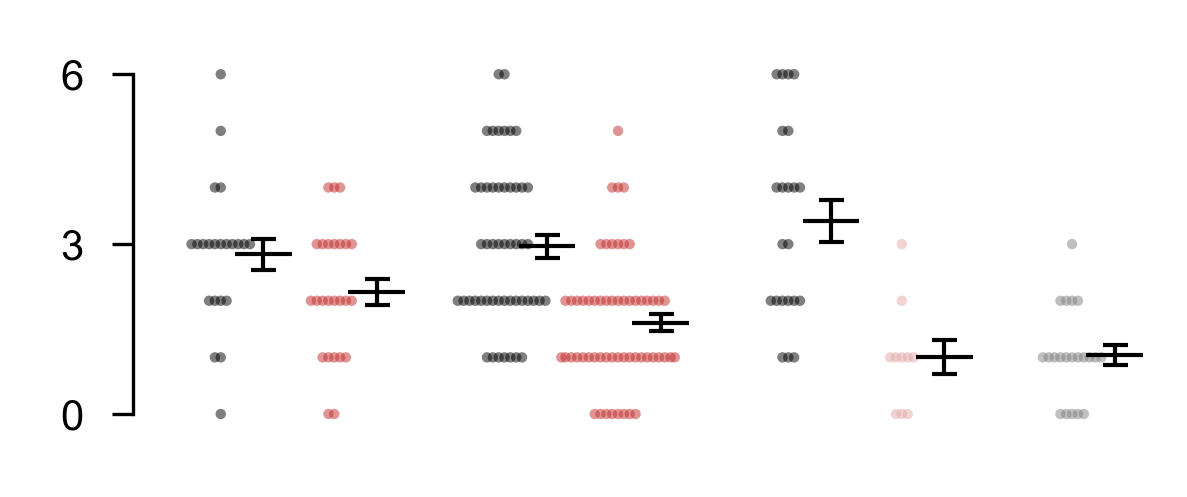

In [57]:
reload(wt)
wt.plot_below_30(below_30_counts,mean_counts,
                 all_geno=False,
                 save=save_figure,
                 savepath=FIGURE_PATH,
                fname='Fig_6k.pdf')

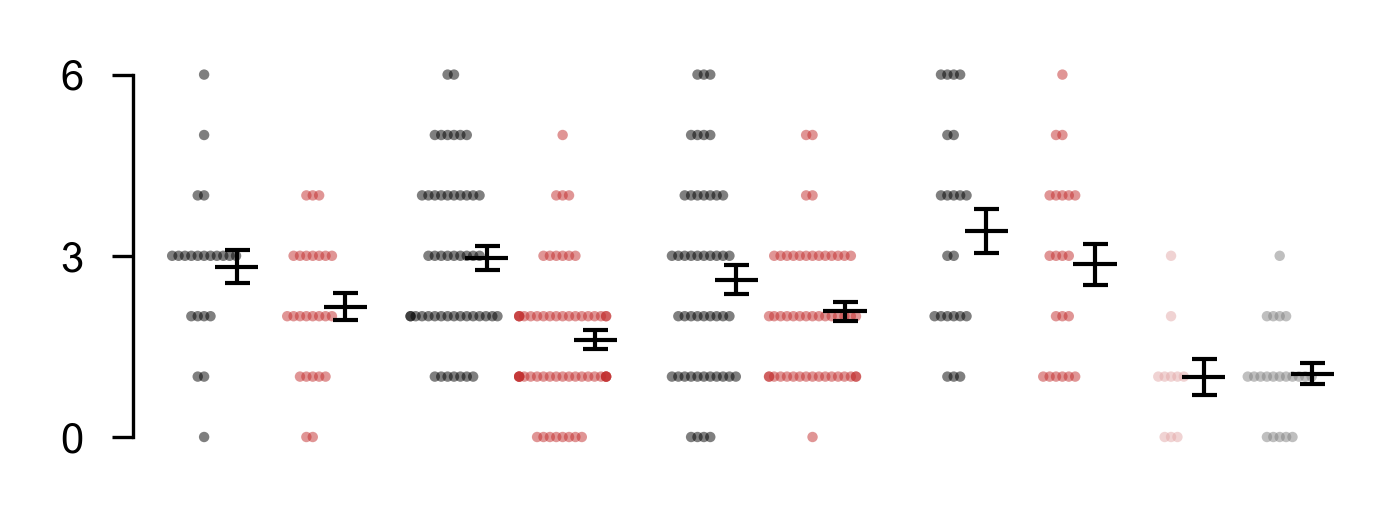

In [58]:
reload(wt)
wt.plot_below_30(below_30_counts,mean_counts,
                 all_geno=True,
                 figsize=[2.5,0.8],
                 save=save_figure,
                 savepath=FIGURE_PATH,
                fname='ED_Fig_11f.pdf')

In [59]:
x=below_30_counts.query('genotype=="57C10_AD_VT037220_DBD_TNT_E_rep1"')['counts'].values
y=below_30_counts.query('genotype=="57C10_AD_VT037220_DBD_TNT_Q_rep1"')['counts'].values

test_rep1_57C10_tnt = sc.stats.mannwhitneyu(x,y)
print(test_rep1_57C10_tnt)

mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x,mean_y)
print(mean_x-mean_y)

MannwhitneyuResult(statistic=195.5, pvalue=0.039774463640153815)
2.16 2.8181818181818183
-0.6581818181818182


In [60]:
x=below_30_counts.query('genotype=="57C10_AD_VT037220_DBD_TNT_E_rep2"')['counts'].values
y=below_30_counts.query('genotype=="57C10_AD_VT037220_DBD_TNT_Q_rep2"')['counts'].values

test_rep2_57C10_tnt = sc.stats.mannwhitneyu(x,y)
print(test_rep2_57C10_tnt)

mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x,mean_y)
print(mean_x-mean_y)

MannwhitneyuResult(statistic=664.5, pvalue=5.251931058286208e-07)
1.6140350877192982 2.96
-1.3459649122807018


Combined p-value

In [61]:
sc.stats.combine_pvalues([test_rep1_57C10_tnt[1],test_rep2_57C10_tnt[1]], method='fisher')

(35.368060022111806, 3.9029582404110904e-07)

In [62]:
x=below_30_counts.query('genotype=="27E08_AD_VT037220_DBD_TNT_E"')['counts'].values
y=below_30_counts.query('genotype=="27E08_AD_VT037220_DBD_TNT_Q"')['counts'].values

test_27E08_tnt = sc.stats.mannwhitneyu(x,y)
print(test_27E08_tnt)

mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x,mean_y)
print(mean_x-mean_y)



MannwhitneyuResult(statistic=994.0, pvalue=0.06681389018877193)
2.08 2.6041666666666665
-0.5241666666666664


In [63]:
x=below_30_counts.query('genotype=="57C10_AD_VT037220_DBD_shibire"')['counts'].values
y=below_30_counts.query('genotype=="empty_AD_empty_DBD_shibire"')['counts'].values

test_57C10_shib = sc.stats.mannwhitneyu(x,y)
print(test_57C10_shib)

mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x,mean_y)
print(mean_x-mean_y)

MannwhitneyuResult(statistic=188.5, pvalue=0.14938947819346898)
2.857142857142857 3.409090909090909
-0.551948051948052


### Model simulation of silencing PFL3 neurons

Wind-direction error

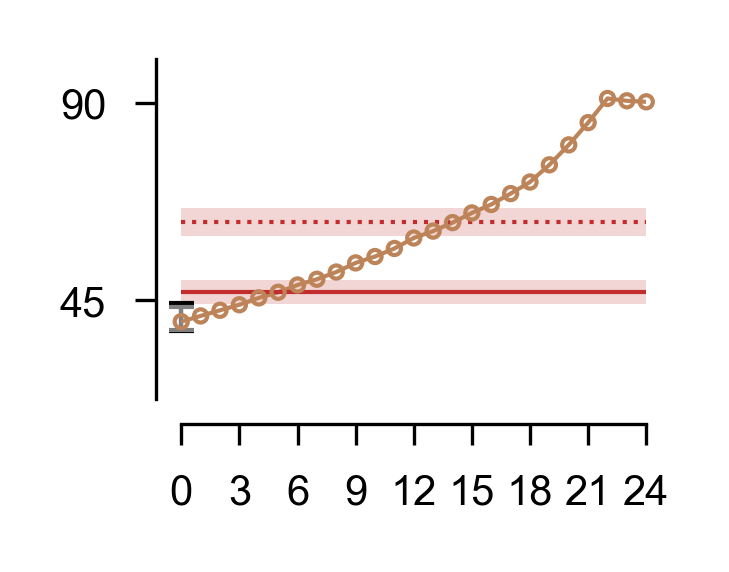

In [64]:
reload(wt)
wt.plot_predicted_error(genotype_error_after_df, 
                        save=save_figure,
                        savepath=FIGURE_PATH,
                       fname='ED_Fig_11h_error.pdf')

Number of correct directions

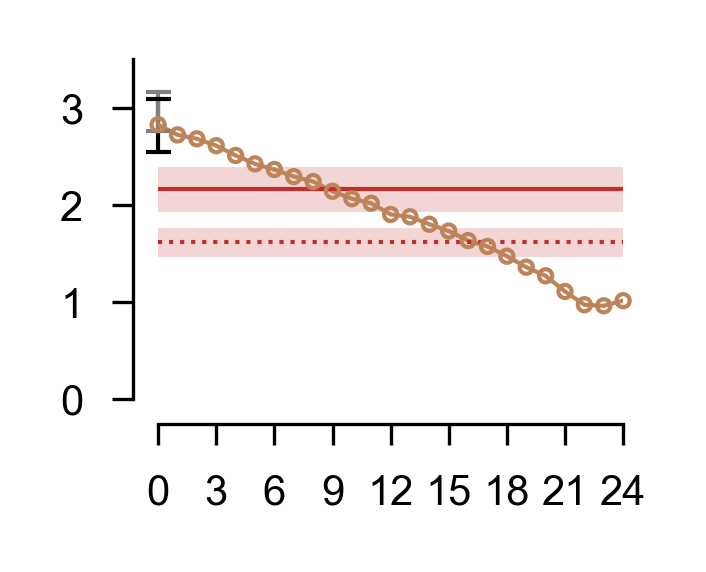

In [65]:
reload(wt)
wt.plot_predicted_correct(mean_counts, 
                          save=save_figure,
                        savepath=FIGURE_PATH,
                       fname='ED_Fig_11h_correct_directions.pdf')

# Save processed data for sharing

In [176]:
PROCESSED_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/shared_data/Wind_task/'

In [190]:
reload(wt)
wt.save_processed_data(PROCESSED_DATA_PATH,genotypes)